# Benchmark Exploration Notebook

This notebook automates parsing all four benchmark instances, computes key statistics, and provides visualizations of random subgraphs for each.

In [7]:
# make sure Python can see our src/ folder
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

from exploration import GraphExplorer
import pandas as pd
import glob

# now everything should import correctly…


In [8]:
# Import our GraphExplorer and necessary libraries
#from src.exploration import GraphExplorer
import pandas as pd
import glob

# Collect all benchmark file paths
graph_paths = sorted(glob.glob('../data/benchmarks/*.txt'))

# Compute stats for each instance
stats_list = []
for path in graph_paths:
    exp = GraphExplorer(path)
    exp.parse()
    stats = exp.compute_basic_stats()
    stats['file'] = path.split('/')[-1]
    stats_list.append(stats)

print(stats_list)
# Build DataFrame from the list of stats
df = pd.DataFrame(stats_list)



# Save DataFrame to CSV file
# df.to_csv('data/benchmarks/graph_stats.csv', index=False)


[{'num_nodes': 138, 'num_edges': 493, 'density': 0.05215275573891886, 'avg_degree': 7.144927536231884, 'degree_histogram': Counter({1: 25, 3: 25, 2: 18, 6: 13, 4: 10, 7: 9, 5: 8, 10: 4, 11: 3, 15: 3, 8: 2, 14: 2, 13: 2, 12: 2, 27: 2, 71: 1, 18: 1, 50: 1, 9: 1, 43: 1, 44: 1, 16: 1, 47: 1, 25: 1, 40: 1}), 'num_components': 1, 'component_sizes': [138], 'avg_clustering': 0.6533311186357879, 'file': 'benchmarks\\test1.txt'}, {'num_nodes': 500, 'num_edges': 62624, 'density': 0.5019959919839679, 'avg_degree': 250.496, 'degree_histogram': Counter({247: 24, 254: 22, 250: 20, 259: 19, 260: 19, 248: 19, 258: 19, 235: 17, 245: 17, 251: 16, 256: 16, 252: 15, 253: 15, 261: 14, 241: 14, 242: 14, 246: 14, 249: 13, 244: 13, 243: 12, 262: 12, 239: 11, 237: 11, 255: 10, 257: 9, 240: 9, 234: 8, 269: 8, 265: 8, 264: 7, 263: 6, 238: 6, 267: 6, 268: 5, 266: 4, 231: 4, 270: 4, 236: 4, 233: 4, 230: 4, 232: 3, 272: 2, 271: 2, 227: 2, 222: 2, 276: 2, 220: 2, 279: 2, 280: 1, 274: 1, 277: 1, 223: 1, 286: 1, 226: 1

In [9]:
df.head()

,num_nodes,num_edges,density,avg_degree,degree_histogram,num_components,component_sizes,avg_clustering,file
0,138,493,0.052153,7.144928,"{1: 25, 6: 13, 11: 3, 2: 18, 3: 25, 4: 10, 71:...",1,[138],0.653331,benchmarks\test1.txt
1,500,62624,0.501996,250.496000,"{261: 14, 259: 19, 252: 15, 272: 2, 260: 19, 2...",1,[500],0.501864,benchmarks\test2.txt
2,1000,246708,0.493910,493.416000,"{489: 33, 493: 44, 490: 39, 495: 33, 491: 39, ...",1,[1000],0.494085,benchmarks\test3.txt
3,900,307350,0.759733,683.000000,{683: 900},1,[900],0.764125,benchmarks\test4.txt


## Visualizations: 
Below we draw the graph for each benchmark.

### benchmarks\test1.txt


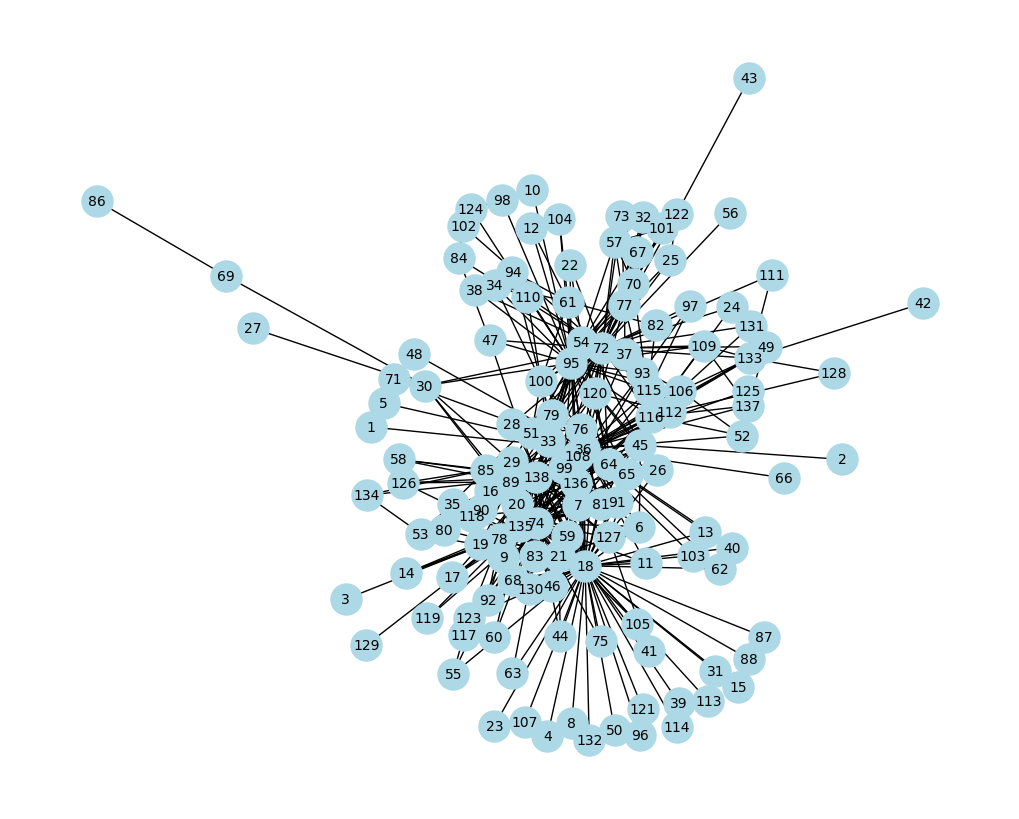

### benchmarks\test2.txt


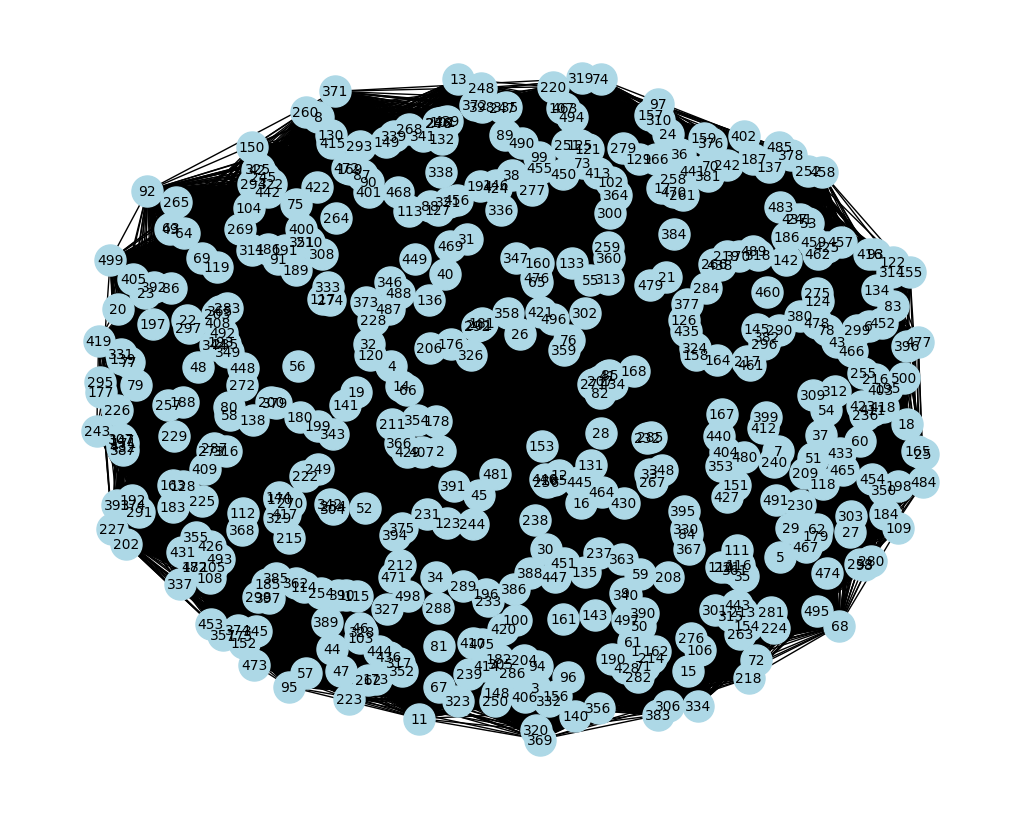

### benchmarks\test3.txt


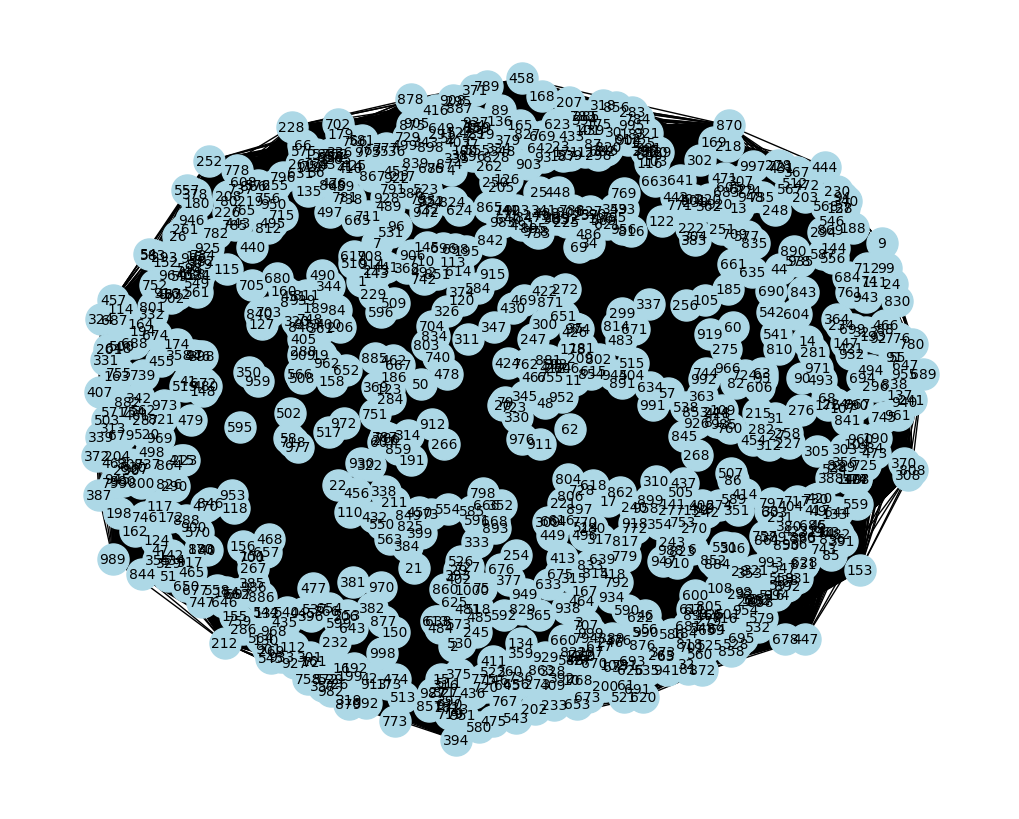

### benchmarks\test4.txt


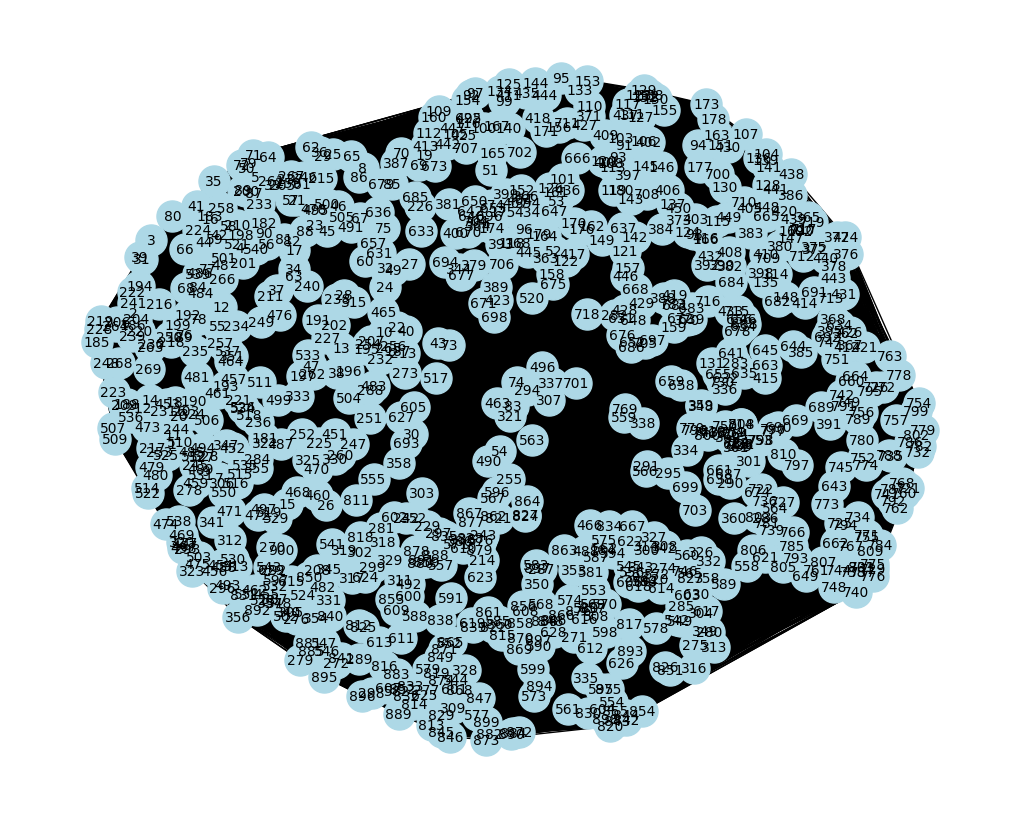

In [10]:
# Plot random subgraphs for each instance
for path in graph_paths:
    exp = GraphExplorer(path)
    exp.parse()
    print(f"### {path.split('/')[-1]}")
    exp.draw_graph()